In [677]:
%load_ext autoreload
%autoreload 2
%matplotlib notebook

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [678]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

from cpyment import CModel

In [701]:
cm = CModel('SIR')
cm.set_coupling_rate('S*I', 0.3, 'beta')
cm.set_coupling_rate('I:I=>R', 0.1, 'gamma')

In [717]:
dbeta = 0.0
dgamma = 0.004

cmmod = CModel('SIR')
cmmod.set_coupling_rate('S*I', 0.3+dbeta, 'beta')
cmmod.set_coupling_rate('I:I=>R', 0.1+dgamma, 'gamma')

In [718]:
t = np.linspace(0, 100, 1000)
y0 = np.array([0.99, 0.01, 0])

traj = cm.integrate_wgrad(t, y0)
trajmod = cmmod.integrate(t, y0)

In [719]:
cm.diff_gradient(np.array([0,0,0]), np.array([0.2,1,0.5,0.3,2,0]))

array([ 0. , -0.1,  0.1,  0. , -0.2,  0.2])

<IPython.core.display.Javascript object>


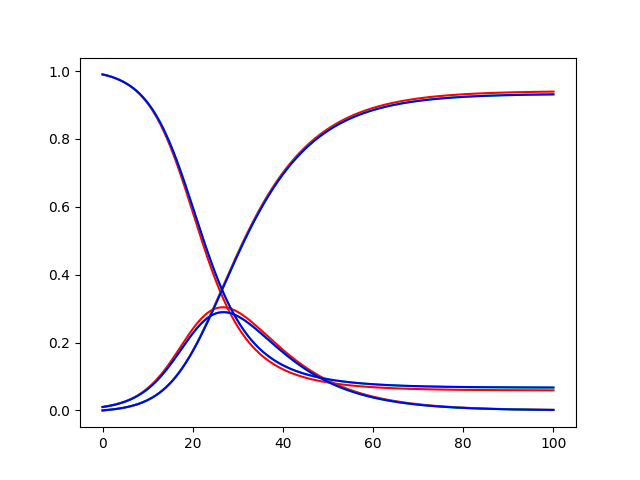

In [720]:
fig, ax = plt.subplots()

ax.plot(t, traj['y'], c=(1,0,0))
ax.plot(t, traj['y']+traj['dy/d(beta)']*dbeta+traj['dy/d(gamma)']*dgamma, c=(0,1,0))
ax.plot(t, trajmod, c=(0,0,1))